 # <div style="text-align: center">Shoot Outcome Prediction</div>

 ## <div style="text-align: center">Support Vector Machines</div>

### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = "/Users/ysadre/Desktop/NBA Expected Point/Data/"
dataset = pd.read_csv(file_path + "PredictIonProject.csv", delimiter=";")
dataset.head(10) #Return 10 rows of data

,player_name,CLOSEST_DEFENDER,PTS_TYPE,SHOT_DIST,SHOT_DIST^2/100,CLOSE_DEF_DIST,CLOSE_DEF_DIST.1,SHOT_RESULT
0,brian roberts,Anderson; Alan,2,77,59.29,13,1.69,1
1,brian roberts,Bogdanovic; Bojan,3,282,795.24,61,37.21,0
2,brian roberts,Bogdanovic; Bojan,2,101,102.01,9,0.81,0
3,brian roberts,Brown; Markel,2,172,295.84,34,11.56,0
4,brian roberts,Young; Thaddeus,2,37,13.69,11,1.21,0
5,brian roberts,Williams; Deron,2,184,338.56,26,6.76,0
6,brian roberts,Jack; Jarrett,2,207,428.49,61,37.21,0
7,brian roberts,Plumlee; Mason,2,35,12.25,21,4.41,1
8,brian roberts,Morris; Darius,3,246,605.16,73,53.29,0
9,brian roberts,Ellington; Wayne,3,224,501.76,198,392.04,0


In [6]:
X = dataset.iloc[:,2:7].values
y = dataset.iloc[:,7:8].values

### Model Fitting

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
len(X)

128069

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [12]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [13]:
y_pred = svclassifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4961 2030]
 [3057 2759]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      6991
           1       0.58      0.47      0.52      5816

    accuracy                           0.60     12807
   macro avg       0.60      0.59      0.59     12807
weighted avg       0.60      0.60      0.60     12807



In [15]:
ypred=[]
for elem in y_pred:
    ypred.append(elem)

In [16]:
ytest=[]
for elem in y_test:
    ytest.append(elem)

In [17]:
cm = confusion_matrix(y_true=ytest, y_pred=ypred)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     #   plt.text(j, i, cm[i, j],
      #      horizontalalignment="center",
       #     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4961 2030]
 [3057 2759]]


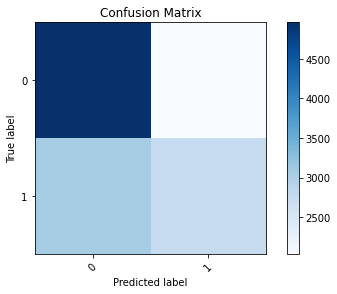

In [18]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')